# JORGE NAVARRO GONZÁLEZ - MARIO UBIERNA SAN MAMÉS

## Práctica 6 - Comunidades

In [1]:
#Importaciones
import networkx as nx
import matplotlib.pyplot as plt
import random as random

### 1 - Modularidad

E:\Users\Jorge\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


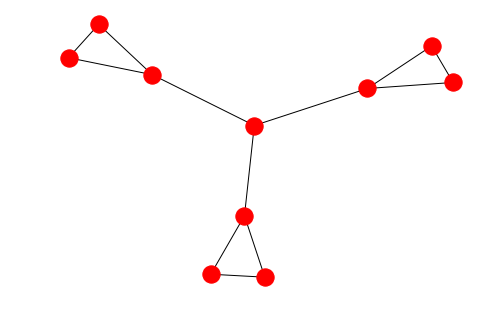

In [2]:
# 1.1 Creación del grafo y el diccionario
G = nx.Graph(nombre='grafo',tipo='no-dirigida')
G.add_edge("node1","node3",peso = 1)
G.add_edge("node1","node7",peso = 1)
G.add_edge("node3","node7",peso = 1)
G.add_edge("node3","node4",peso = 1)
G.add_edge("node4","node5",peso = 1)
G.add_edge("node5","node2",peso = 1)
G.add_edge("node2","node6",peso = 1)
G.add_edge("node5","node6",peso = 1)
G.add_edge("node4","node8",peso = 1)
G.add_edge("node8","node9",peso = 1)
G.add_edge("node8","node10",peso = 1)
G.add_edge("node9","node10",peso = 1)
nx.draw(G)

dic_grafo = {'node1':'c1', 
             'node2':'c2', 
             'node3':'c1', 
             'node4':'c1', 
             'node5':'c2', 
             'node6':'c2', 
             'node7':'c1',
             'node8':'c3', 
             'node9':'c3', 
             'node10':'c3'}

In [3]:
def misma_comunidad(n1,n2,dic_grafo):
    if dic_grafo[n1] == dic_grafo[n2]:
        return 1
    return 0

In [4]:
# 1.1 Funcióm modularidad
def modularidad(grafo, diccionario):
    #Aij = nx.to_numpy_matrix(G)
    Aij = 0
    sumatorio = 0
    m = grafo.number_of_edges()
    
    for i in diccionario.keys():
        for j in diccionario.keys():
            if misma_comunidad(i,j,diccionario):
                grado_ki = grafo.degree(i)
                grado_kj = grafo.degree(j)
                if grafo.has_edge(i,j):
                    Aij = grafo[i][j]['peso']
                else:
                    Aij = 0
                sumatorio+=Aij-((grado_ki*grado_kj)/(2*m))
    return (sumatorio)/(2*m)
            

In [5]:
#1.2 ejemplo wikipedia
mod = modularidad(G,dic_grafo)
print("El valor de la modularidad del ejemplo de Wikipedia: " + str(mod))

El valor de la modularidad del ejemplo de Wikipedia: 0.4895833333333333


Para un partición correspondiente a toda la red: -3.416070845000482e-17
Para una partición correspondiente a cada nodo: -0.12721893491124261
Para la partición de colores: 0.42307692307692296


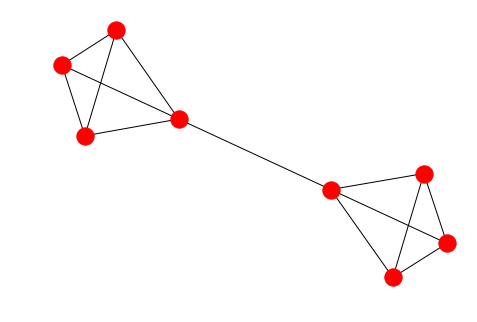

In [6]:
#2 Ejemplo clase
G = nx.Graph(nombre='grafo',tipo='no-dirigida')
G.add_edge("node1","node2",peso = 1)
G.add_edge("node1","node3",peso = 1)
G.add_edge("node1","node4",peso = 1)
G.add_edge("node2","node4",peso = 1)
G.add_edge("node2","node3",peso = 1)
G.add_edge("node3","node4",peso = 1)
G.add_edge("node4","node5",peso = 1)
G.add_edge("node5","node6",peso = 1)
G.add_edge("node5","node7",peso = 1)
G.add_edge("node5","node8",peso = 1)
G.add_edge("node6","node7",peso = 1)
G.add_edge("node6","node8",peso = 1)
G.add_edge("node7","node8",peso = 1)
nx.draw(G)

#a.
dic_grafo_a = {'node1':'c1', 
             'node2':'c1', 
             'node3':'c1', 
             'node4':'c1', 
             'node5':'c1', 
             'node6':'c1', 
             'node7':'c1',
             'node8':'c1'}

modA = modularidad(G, dic_grafo_a)
print("Para un partición correspondiente a toda la red: " + str(modA))

#b.
dic_grafo_b = {'node1':'c1', 
             'node2':'c2', 
             'node3':'c3', 
             'node4':'c4', 
             'node5':'c5', 
             'node6':'c6', 
             'node7':'c7',
             'node8':'c8'}

modB = modularidad(G, dic_grafo_b)
print("Para una partición correspondiente a cada nodo: " + str(modB))

#c.
dic_grafo_c = {'node1':'c1', 
             'node2':'c1', 
             'node3':'c1', 
             'node4':'c1', 
             'node5':'c2', 
             'node6':'c2', 
             'node7':'c2',
             'node8':'c2'}

modC = modularidad(G, dic_grafo_c)
print("Para la partición de colores: " + str(modC))

### 2 - Detección de comunidades basada en la eliminación de enlaces

In [7]:
from copy import deepcopy

def comunidades(G):
    componentes_conectados = list(nx.connected_components(G))   
    while(len(componentes_conectados) == 1):
        enlace = eliminar_enlace(G)
        G.remove_edge(enlace[0],enlace[1])
        componentes_conectados = list(nx.connected_components(G))       
    return componentes_conectados

def eliminar_enlace(G):
    enlaces_betweenness = nx.edge_betweenness_centrality(G)
    lista_enlaces_betweenness = list(enlaces_betweenness.items())
    lista_enlaces_betweenness.sort(key = lambda x:x[1], reverse = True) #Ordenamos las tuplas por su betweenness
    return lista_enlaces_betweenness[0][0] #Devuelve el enlace con más betweenness

def asignarcomunidades(grafo):
    componentes_conectados = comunidades(grafo)
    diccionario ={}
    numero_comunidad=1
    for i in componentes_conectados:
        for j in i:
            diccionario[j] =str(numero_comunidad)
        numero_comunidad+=1
    return diccionario

def girvanNewman(grafo):
     
    best = None
    particion = {}
    grafo_temporal = deepcopy(grafo)
    subgrafos = []
    
    while grafo_temporal.edges():
        enlace = eliminar_enlace(grafo_temporal)
        grafo_temporal.remove_edge(enlace[0],enlace[1])
        if len(list(nx.connected_components(grafo_temporal)))!=1:                
            diccionario=asignarcomunidades(grafo_temporal)             
            modularidad_grafo = modularidad(grafo, diccionario)
            n=len((set(diccionario.values())))
            if n not in particion.keys() or modularidad_grafo > modularidad(grafo, particion[n]):
                particion[n] = diccionario
            if best is None or modularidad_grafo > modularidad(grafo, best):
                best = diccionario
    
    return best, particion

In [10]:
def preprocesar(grafo):
    nx.set_edge_attributes(grafo,1, 'peso')
    return grafo

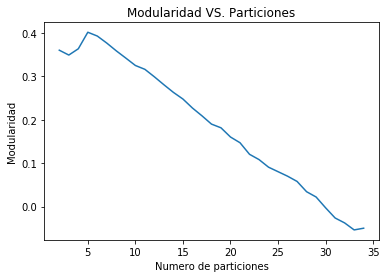

In [11]:
grafo_karate = nx.karate_club_graph()
grafo_karate_preprocesado = preprocesar(grafo_karate)

best, resultado = girvanNewman(grafo_karate_preprocesado)

eje_y = []
for y in resultado.values():
    eje_y.append(modularidad(grafo_karate_preprocesado,y))
eje_x = list(resultado.keys())

fig, ax = plt.subplots()
ax.plot(eje_x,eje_y)

ax.set(xlabel='Numero de particiones', ylabel ='Modularidad' , title='Modularidad VS. Particiones')

plt.show()